##Hypothesis Generation Based On Various Factors

**1) Price**

The price of an item can heavily affect the sales of the product.
- *High price*:If the price of a product is too high,there are less number of people who can afford it which can reduce the sales
- *Average/Less price*:If the price of the product is reasonable or less, people are more likely to buy that product.

*There is a catch though, even if a single high price product sells, it is equavalent to many less price products purchased*

**2) Area**

The Location of the supermarket greatly affects the sales of products and the store as a whole.
- *High Density Areas*:The sales of the store as a whole and as individual products will be high.
- *Low Density Areas*:The sales of the store as a whole and as individual products will be low.

**3) Size of Store**

The size of the store can also affect the sales
- *Large Stores*:The wait time and variety of products are more and hence increased sales on products.
- *Small Stores*:The wait time and variety of products are less and hence decreased sales on products.

##Loading Packages and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
test_df=pd.read_csv("/content/Test.csv")
train_df=pd.read_csv("/content/Train.csv")

##Data Structure and Content

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [ ]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

*All the data types look good, no need to change*

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [ ]:
test_df.shape

(5681, 11)

In [ ]:
train_df.shape

(8523, 12)

In [ ]:
test_df.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

*All unique values in test data*

In [ ]:
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

*All unique values in train data*

##Missing Value Treatment

In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

*We can see, there are null values present and we need to deal with them*

In [ ]:
train_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
Item_mean=train_df['Item_Weight'].mean()

In [ ]:
train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)
train_df['Item_Weight'].fillna(Item_mean,inplace=True)

In [ ]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
Item_mean_test=test_df['Item_Weight'].mean()
test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode()[0], inplace=True)
test_df['Item_Weight'].fillna(Item_mean_test, inplace=True)
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
duplicate_train=train_df.duplicated()
duplicate_train.sum()

0

*No duplicates present*



##Feature Engineering
*We should analyse each of the varariable and find something*

In [ ]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train_df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

*Nothing to get out of it for now*

In [ ]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

*We can see that LF, reg,low fat are misspelled and can be placed in other columns*

In [ ]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

print(train_df['Item_Fat_Content'].value_counts())
print("AFTER:")
print(test_df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
AFTER:
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [ ]:
test_df['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

*There are too many types and reducing their types would be a better thing during model building*

*I have decided to break them into 4 types:*
1.   Perishable food
2.   Non-Perishable food
3.   Non-Consumable
4.   Drinks

In [ ]:
train_df['Item_Type'] = train_df['Item_Type'].replace({'Snack Foods':'Non-Perishable Food',
                                                       'Fruits and Vegetables':'Perishable Food',
                                                       'Household':'Non-Consumable',
                                                       'Frozen Foods':'Non-Perishable Food',
                                                       'Dairy':'Perishable Food',
                                                       'Baking Goods':'Perishable Food',
                                                       'Canned':'Non-Perishable Food',
                                                       'Health and Hygiene':'Non-Consumable',
                                                       'Meat':'Perishable Food',
                                                       'Soft Drinks':'Drinks',
                                                       'Breads':'Perishable Food',
                                                       'Hard Drinks':'Drinks',
                                                       'Starchy Foods':'Non-Perishable Food',
                                                       'Others':'Non-Consumable',
                                                       'Breakfast':'Perishable Food',
                                                       'Seafood':'Perishable Food'})
test_df['Item_Type'] = test_df['Item_Type'].replace({'Snack Foods':'Non-Perishable Food',
                                                       'Fruits and Vegetables':'Perishable Food',
                                                       'Household':'Non-Consumable',
                                                       'Frozen Foods':'Non-Perishable Food',
                                                       'Dairy':'Perishable Food',
                                                       'Baking Goods':'Perishable Food',
                                                       'Canned':'Non-Perishable Food',
                                                       'Health and Hygiene':'Non-Consumable',
                                                       'Meat':'Perishable Food',
                                                       'Soft Drinks':'Drinks',
                                                       'Breads':'Perishable Food',
                                                       'Hard Drinks':'Drinks',
                                                       'Starchy Foods':'Non-Perishable Food',
                                                       'Others':'Non-Consumable',
                                                       'Breakfast':'Perishable Food',
                                                       'Seafood':'Perishable Food'})
print(train_df['Item_Type'].value_counts())
print(test_df['Item_Type'].value_counts())

Perishable Food        3412
Non-Perishable Food    2853
Non-Consumable         1599
Drinks                  659
Name: Item_Type, dtype: int64
Perishable Food        2250
Non-Perishable Food    1915
Non-Consumable         1087
Drinks                  429
Name: Item_Type, dtype: int64


*Above we have segregated based on fat, but non perishables dont have any fat so we should create a new category*

In [ ]:
train_df['Item_Type_Combined'] = train_df['Item_Identifier'].apply(lambda x: x[0:2])
train_df['Item_Type_Combined'] = train_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
test_df['Item_Type_Combined'] = test_df['Item_Identifier'].apply(lambda x: x[0:2])
test_df['Item_Type_Combined'] = test_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
print(train_df['Item_Type_Combined'].value_counts())
print(test_df['Item_Type_Combined'].value_counts())

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64
Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64


In [ ]:
train_df.loc[train_df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train_df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df.loc[test_df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test_df['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_df.drop(['Item_Type_Combined'],axis=1,inplace=True)
test_df.drop(['Item_Type_Combined'],axis=1,inplace=True)

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Perishable Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Perishable Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Perishable Food,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non-Edible,0.000000,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Non-Perishable Food,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,Regular,0.038428,Perishable Food,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Non-Edible,0.099575,Non-Consumable,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Non-Perishable Food,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Perishable Food,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train_df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
test_df['Item_Visibility'].value_counts()

0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64

*We see a lot of items with ZERO visibility which does not make sense so we can replace them with mean value as we don't have any particular approach for it*

In [ ]:
x = train_df['Item_Visibility']
train_df['Item_Visibility'].replace(to_replace = float(0), value = x.mean(), inplace=True)
train_df['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
y = train_df['Item_Visibility']
test_df['Item_Visibility'].replace(to_replace = float(0), value = y.mean(), inplace=True)
test_df['Item_Visibility'].value_counts()

0.070213    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [ ]:
train_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
train_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
train_df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [ ]:
train_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
train_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

*We can remove those type 1,2,3 and aggregate them into 1 but can we do it? Lets dig a little more and see if it is a good thing or not!*

In [ ]:
train_df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


*As we can se significance difference in their mean sales we will not aggregate them*

##Univariate Analysis

In [ ]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

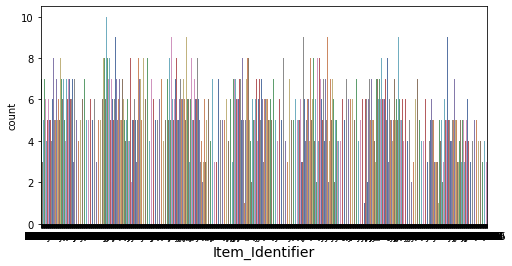

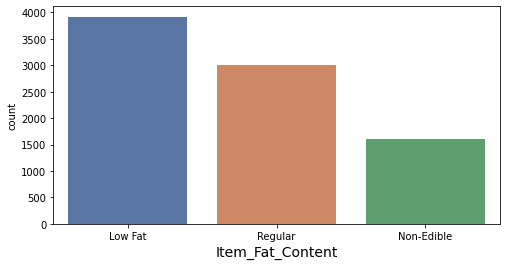

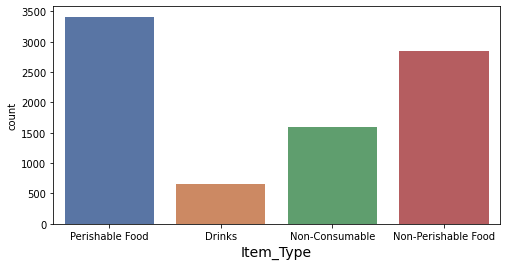

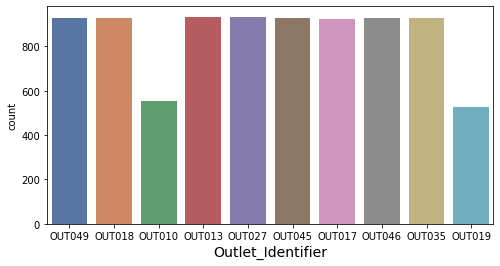

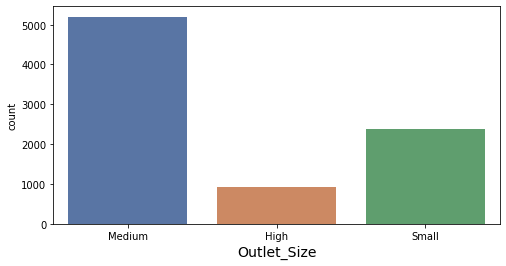

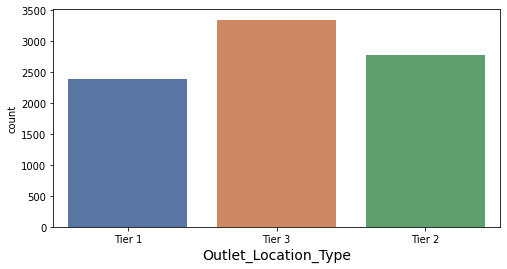

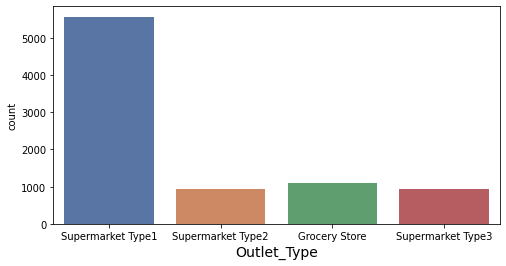

In [ ]:
x = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in x: 
    plt.figure(figsize=(8,4))
    sns.countplot(x = i , data=train_df , palette='deep')
    plt.xlabel(i, fontsize=14)
    plt.show()

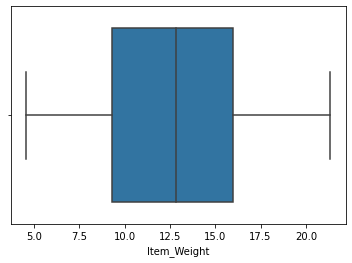

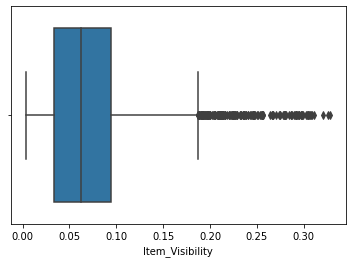

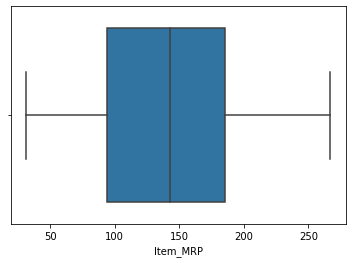

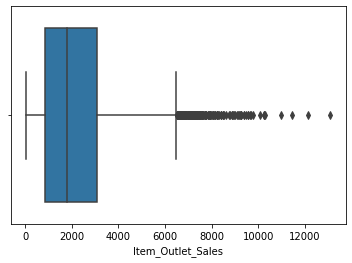

In [ ]:
x= ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' ]
for i in x:
    sns.boxplot(x=i, data=train_df)
    plt.show()

##Bivariate analysis

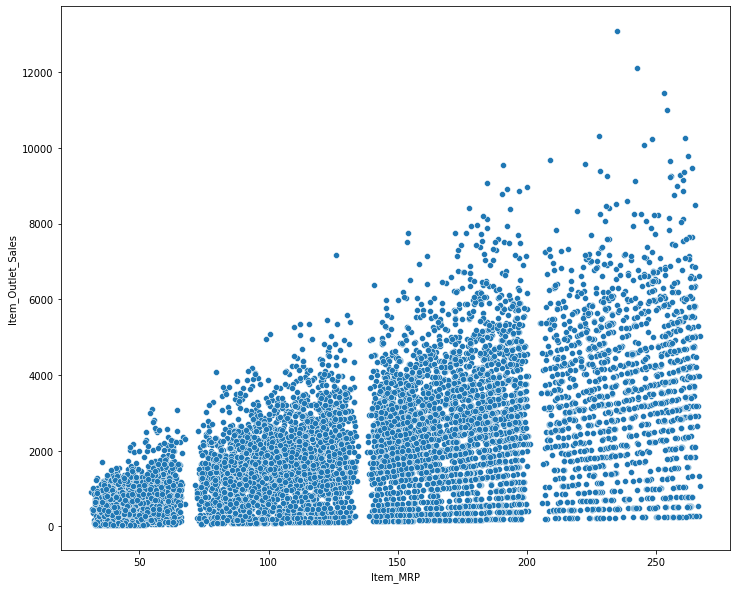

In [ ]:
plt.figure(figsize=[12,10])
sns.scatterplot(x = train_df['Item_MRP'], y = train_df['Item_Outlet_Sales'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


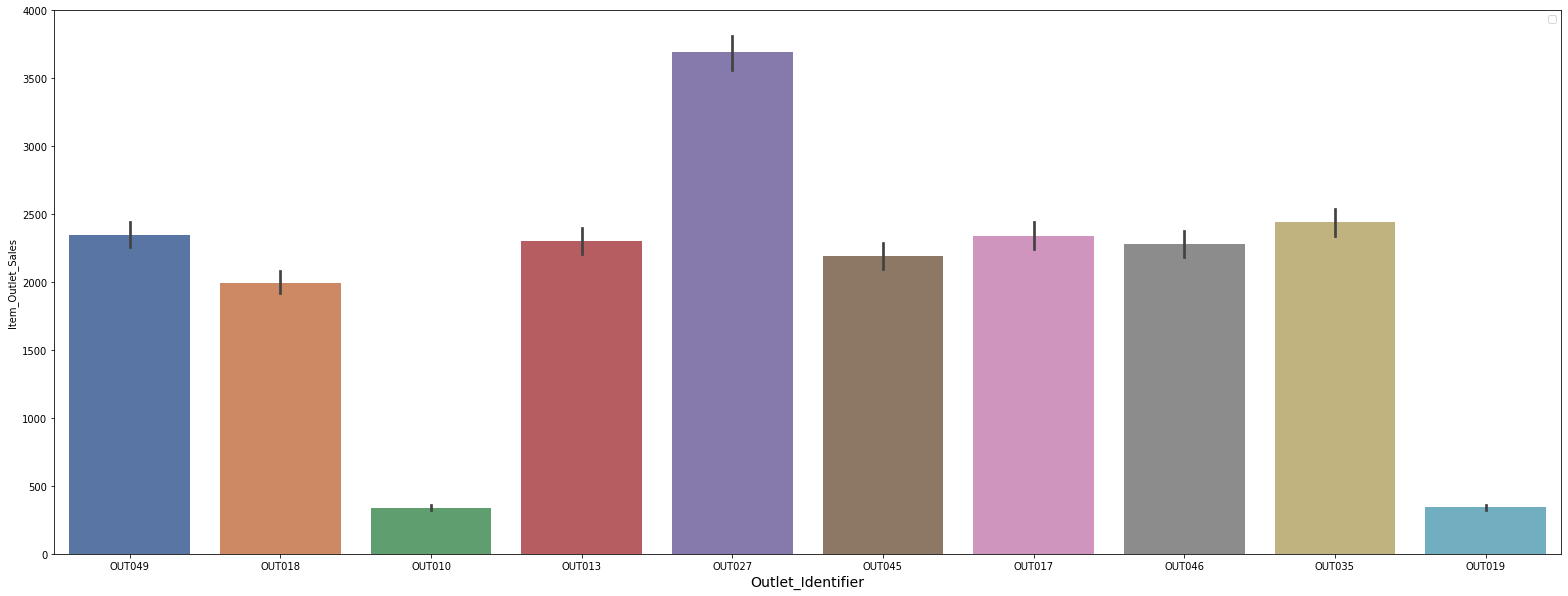

In [ ]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train_df ,palette='deep')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

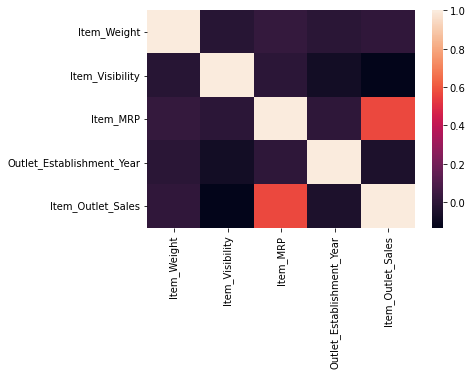

In [ ]:
sns.heatmap(train_df.corr() ,cmap='rocket')

##Encoding Categorical Variables

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Perishable Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Perishable Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Perishable Food,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non-Edible,0.066132,Non-Consumable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Outlet_Identifier'] = le.fit_transform(train_df['Outlet_Identifier'])
train_df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet_Identifier'])


In [ ]:
train_df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Drinks                   uint8
Item_Type_Non-Consumable           uint8
Item_Type_Non-Perishable Food      uint8
Item_Type_Perishable Food          uint8
Outlet_Identifier_0                uint8
Outlet_Identifie

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDA15,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.066132,182.0950,1998,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.066132,53.8614,1987,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
test_df['Outlet_Identifier'] = le.fit_transform(test_df['Outlet_Identifier'])
test_df = pd.get_dummies(test_df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet_Identifier'])


In [ ]:
test_df.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Non-Edible        uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Item_Type_Drinks                   uint8
Item_Type_Non-Consumable           uint8
Item_Type_Non-Perishable Food      uint8
Item_Type_Perishable Food          uint8
Outlet_Identifier_0                uint8
Outlet_Identifier_1                uint8
Outlet_Identifie

In [ ]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,FDW58,20.750000,0.007565,107.8622,1999,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,87.3198,2007,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,241.7538,1998,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,2007,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,0.118599,234.2300,1985,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


##Modeling

*Linear Regression*

In [ ]:
train_df.drop(['Item_Identifier'],axis=1,inplace=True)

In [ ]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.066132,182.0950,1998,732.3800,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.066132,53.8614,1987,994.7052,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
x_orig = train_df.drop('Item_Outlet_Sales', axis=1)
y_orig = pd.DataFrame(train_df['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [ ]:
x_orig

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.300,0.016047,249.8092,1999,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,182.0950,1998,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,53.8614,1987,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_orig

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.5452164508667048
RMSE: 1186.0684948702556


*Ridge*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Ridge
model = Ridge(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

np.sum(model.coef_ != 0)

R2 score 0.5453008894606903
RMSE: 1185.9583824823385


31

*Lasso*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import Lasso
model = Lasso(max_iter=10e5)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score -0.00024579770948407464
RMSE: 1758.9794452421588


*KNN*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.neighbors import KNeighborsRegressor
score_max=0
rmse_max=0
i_max=0
for i in range(1,20):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    y_test = scale.inverse_transform(y_test)
    y_pred = scale.inverse_transform(y_pred)
    
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    if (rmse > rmse_max):
        rmse_max=rmse
        score_max=r2
        i_max=i
                   
print("R2_score", score_max)
print('RMSE:', rmse_max)
print("Neighbour", i_max)

R2_score -1.5090299568567342
RMSE: 4.19192206387387e+61
Neighbour 19


*SVM*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score 0.571002298688511
RMSE: 1151.953316172228


*Decision Tree*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=2)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.20965419780726036
RMSE: 1563.5651149382347


*Random Forest*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<ipython-input-71-b9f462c32af5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


R2 score 0.5451609674612397
RMSE: 1186.140842597375


*AdaptiveBoost*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score 0.4207969100696721
RMSE: 1338.5137343204872


*XGBOOST*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[13:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.5808509801936601
RMSE: 1138.6536016604755


*Cross validation score*

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=5, shuffle=True)

from xgboost import XGBRegressor
model = XGBRegressor()

from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y, cv=kfold, scoring='r2')

print(score.mean())

[13:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:26:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5971626468269247


####The Best model we got was from Extreme Gradient Boost with RMSE of :1138.6

*Apply XGBOOSTING to test data*

In [ ]:
train_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,182.0950,1998,732.3800,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,53.8614,1987,994.7052,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
test_data=test_df.drop(['Item_Identifier'],axis=1)

In [ ]:
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,20.750000,0.007565,107.8622,1999,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,0.038428,87.3198,2007,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,1985,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5677,7.600000,0.142991,169.1448,2009,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5678,10.000000,0.073529,118.7440,2002,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5679,15.300000,0.070213,214.6218,2007,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
test_df.shape

(5681, 32)

In [ ]:
test_data.shape

(5681, 31)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(train_df.drop(['Item_Outlet_Sales'], axis=1))
x_test=scale.fit_transform(test_data)
y=scale.fit_transform(pd.DataFrame(train_df['Item_Outlet_Sales']))

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x,y)

y_pred=pd.DataFrame(model.predict(x_test))
y_pred=scale.inverse_transform(y_pred)

print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_pred.shape)

[13:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(8523, 31)
(8523, 1)
(5681, 31)
(5681, 1)


In [ ]:
x=pd.DataFrame(test_df[['Item_Identifier']], columns=['Item_Identifier'])
y=pd.DataFrame(abs(y_pred), columns=['Item_Outlet_Sales'])

new=pd.concat([x,y], axis=1)

display(new)

,Item_Identifier,Item_Outlet_Sales
0,FDW58,1467.338013
1,FDW14,1389.769531
2,NCN55,576.864868
3,FDQ58,2512.459717
4,FDY38,6069.233887
...,...,...
5676,FDB58,2148.130371
5677,FDD47,2475.408203
5678,NCO17,1806.393066
5679,FDJ26,3578.857422


In [ ]:
new.to_csv("final.csv")